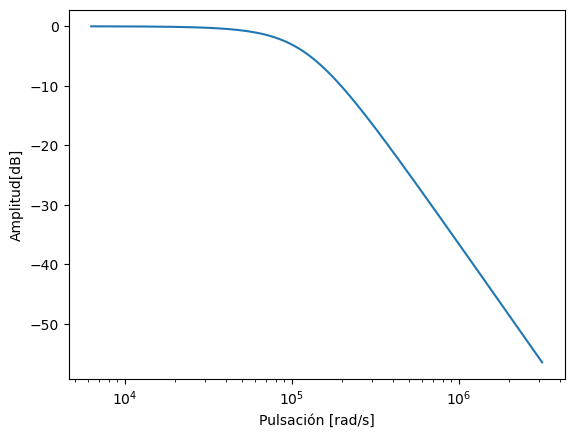

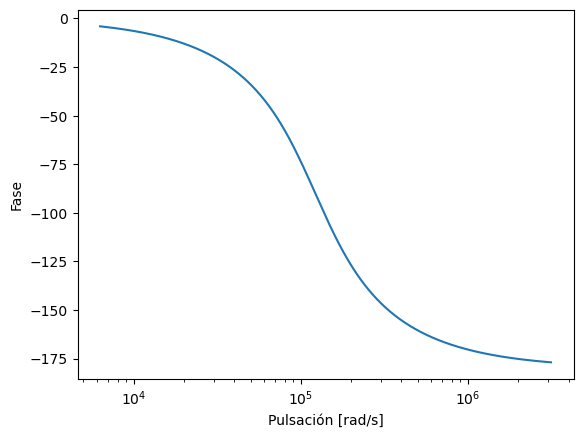

6.72e-11 1.12e-05 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# inicializamos las variables
R1_u = R2_u = 100000
C1_u = 120E-12
C2_u = 56E-12


# creamos los vectores correspondientes a la frecuencia, la amplitud y la fase
w = np.linspace(2*np.pi*1000, 2 * np.pi * 500000, 10000)

# Las cuentas están en función de variables genéricas, identificadas como:
# H(s) = 1/(as^2+bs+c)
# definimos esos parametros primero para probar las funciones
a = R1_u * R2_u * C1_u * C2_u
b = C2_u * (R1_u + R2_u)
c = 1

# Amplitud
H = 1 / np.sqrt(a**2 * w**4 + (b**2-a*c) * w**2 + c**2)
H_dB =20*np.log10(H)

# Fase
#Arg= np.arctan((a * w**3-c*w)/ (-b * w**2 + 1))
Arg = np.arctan2((-b*w), (-a * w**2 + c))
Arg_aux = np.where(Arg>0, Arg-2*np.pi,Arg)
Arg_grados=np.degrees(Arg_aux)


# Luego probamos las funciones de amplitud y fase entre 100Hz y 100kHz
plt.semilogx(w, H_dB)
plt.xlabel('Pulsación [rad/s]')
plt.ylabel('Amplitud[dB]')
plt.show()

plt.semilogx(w, Arg_grados)
plt.xlabel('Pulsación [rad/s]')
plt.ylabel('Fase')
plt.show()
print(a,b,c)

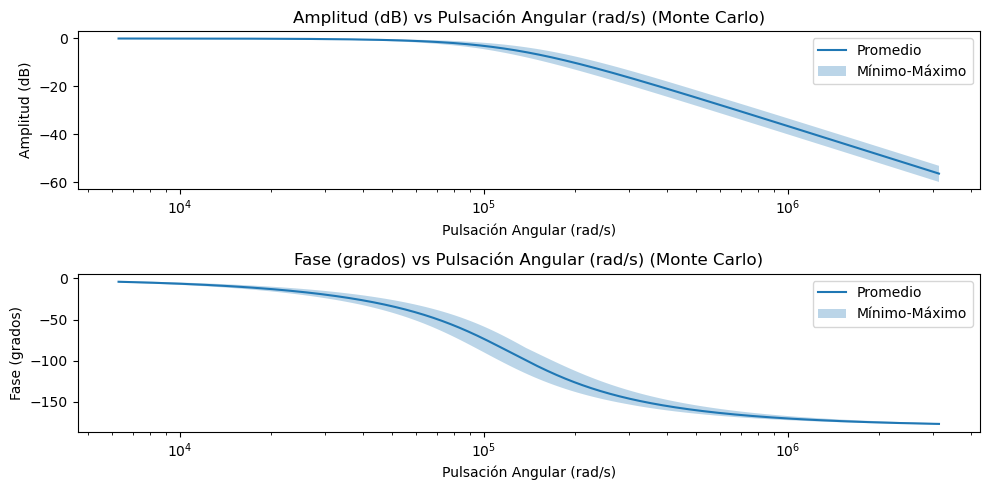

In [6]:
#Ahora si, comenzamos el metodo de Monte Carlo
n_simulaciones = 5000

sigma_relativo = 0.05
d = 1
amplitudes_simuladas_dB = np.zeros((n_simulaciones, len(w)))
fases_simuladas_grados = np.zeros((n_simulaciones, len(w)))

# Ahora creamos las distribuciones normales de estos valores considerando que el 5% de la tolerancia corresponde
# al sigma de la distribución normal
for i in range(n_simulaciones):
    R1 = R1_u*np.random.normal(1, sigma_relativo)
    R2 = R2_u*np.random.normal(1, sigma_relativo)
    C1 = C1_u*np.random.normal(1, sigma_relativo)
    C2 = C2_u*np.random.normal(1, sigma_relativo)
    a = R1 * R2 * C1 * C2
    b = C2 * (R1 + R2)
    c = 1
    # Amplitud
    H = 1 / np.sqrt(a**2 * w**4 + (b**2-a*c) * w**2 + c**2)
    H_dB =20*np.log10(H)

    # Fase
    #Arg= np.arctan((a * w**3-c*w)/ (-b * w**2 + 1))
    Arg = np.arctan2((-b*w), (-a * w**2 + c))
    Arg_aux = np.where(Arg>0, Arg-2*np.pi,Arg)
    Arg_grados=np.degrees(Arg_aux)


    # Almacenar resultados de simulación
    amplitudes_simuladas_dB[i, :] = H_dB
    fases_simuladas_grados[i, :] = Arg_grados
# Calcular valores máximos y mínimos
max_amplitudes = np.max(amplitudes_simuladas_dB, axis=0)
min_amplitudes = np.min(amplitudes_simuladas_dB, axis=0)
max_fases = np.max(fases_simuladas_grados, axis=0)
min_fases = np.min(fases_simuladas_grados, axis=0)

# Visualización de resultados promediados, máximos y mínimos
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.semilogx(w, np.mean(amplitudes_simuladas_dB, axis=0), label='Promedio')
plt.fill_between(w, min_amplitudes, max_amplitudes, alpha=0.3, label='Mínimo-Máximo')
plt.title('Amplitud (dB) vs Pulsación Angular (rad/s) (Monte Carlo)')
plt.xlabel('Pulsación Angular (rad/s)')
plt.ylabel('Amplitud (dB)')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(w, np.mean(fases_simuladas_grados, axis=0), label='Promedio')
plt.fill_between(w, min_fases, max_fases, alpha=0.3, label='Mínimo-Máximo')
plt.title('Fase (grados) vs Pulsación Angular (rad/s) (Monte Carlo)')
plt.xlabel('Pulsación Angular (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

plt.tight_layout()
plt.show()
